### Task 3 : Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df=pd.read_csv("C:/Users/Vaishnavi Chavan/Downloads/bank.csv",sep=';', quotechar='"')

## Display Data

In [3]:
# Top 5 Records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Bottom 5 Records
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
# Size of Data
df.size

76857

In [6]:
# Shape of Data
df.shape

(4521, 17)

## Information of Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


## Show Statistical Summary

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


## Create Shallow Copy

In [9]:
df1=df.copy()

In [10]:
# Check Null Values
df1.isnull().sum().sum()

0

In [11]:
# Check Datatype of all columns
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Label Encoding

In [12]:
# Import Label Encoder
from sklearn.preprocessing import LabelEncoder

In [13]:
# Creating object 
le=LabelEncoder()

In [14]:
df1["job"]=le.fit_transform(df1["job"])
df1["marital"]=le.fit_transform(df1["marital"])
df1["education"]=le.fit_transform(df1["education"])
df1["default"]=le.fit_transform(df1["default"])
df1["housing"]=le.fit_transform(df1["housing"])
df1["contact"]=le.fit_transform(df1["contact"])
df1["month"]=le.fit_transform(df1["month"])
df1["poutcome"]=le.fit_transform(df1["poutcome"])

In [15]:
# check Datypes
df1.dtypes

age           int64
job           int32
marital       int32
education     int32
default       int32
balance       int64
housing       int32
loan         object
contact       int32
day           int64
month         int32
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int32
y            object
dtype: object

In [16]:

df1["loan"]=le.fit_transform(df1["loan"])
df1["y"]=le.fit_transform(df1["y"])

In [17]:
df1.dtypes

age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

## Outlier

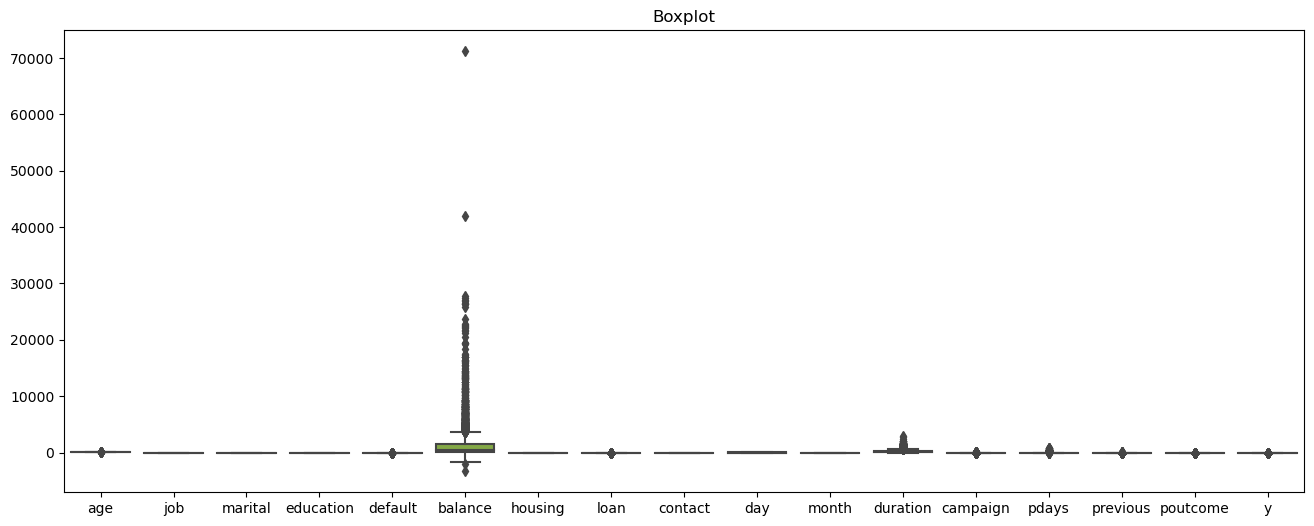

In [18]:
#  Plot boxplot to see the outliers
plt.figure(figsize=(16,6))
sns.boxplot(df1)
plt.title("Boxplot")
plt.show()

In [19]:
# Remove Outlier

In [20]:
Q1=df1.quantile(q=0.25)
Q3=df1.quantile(q=0.75)

In [21]:
IQR=Q3-Q1

In [22]:
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [23]:
df2=df1[~((df1>upper)|(df1<lower))]

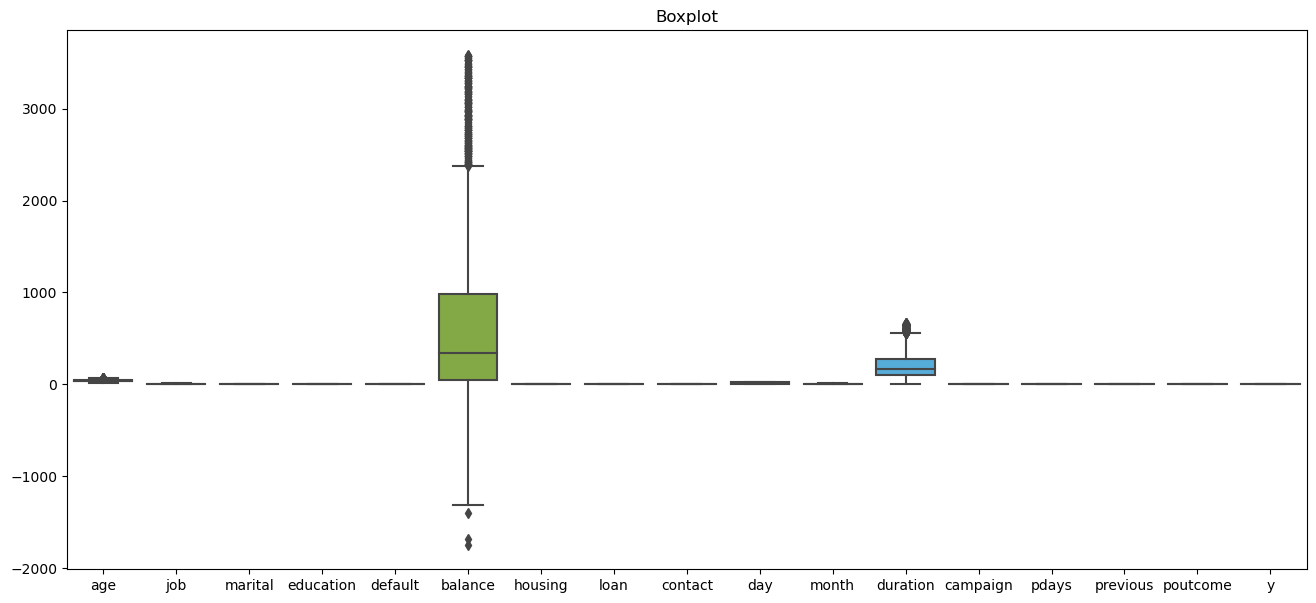

In [24]:
plt.figure(figsize=(16,7))
sns.boxplot(df2)
plt.title("Boxplot")
plt.show()

<Axes: >

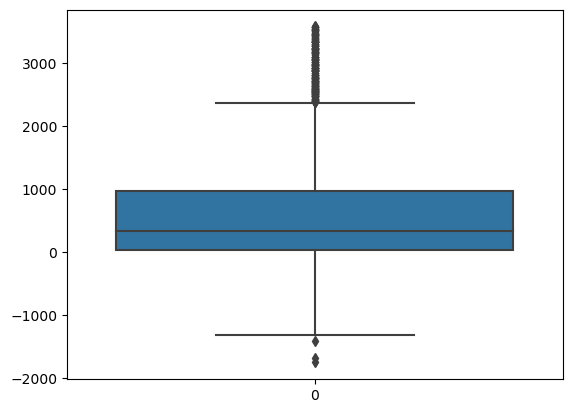

In [25]:
sns.boxplot(df2["balance"])

In [26]:
Q3=df2["balance"].quantile(q=0.75)
Q1=df2["balance"].quantile(q=0.25)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [27]:
df2["balance"]=df2["balance"][~(df2["balance"]>upper)|(df2["balance"]<lower)]

<Axes: >

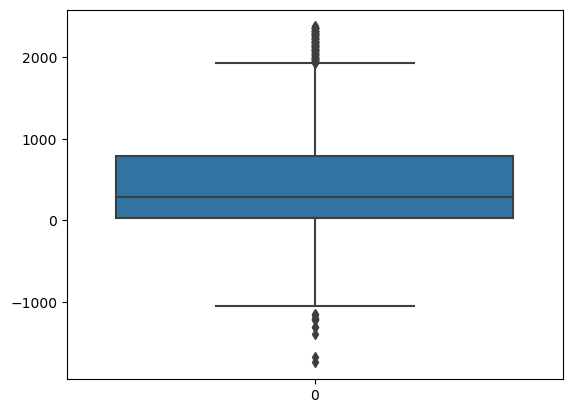

In [28]:
sns.boxplot(df2["balance"])

In [29]:
Q3=df2["balance"].quantile(q=0.75)
Q1=df2["balance"].quantile(q=0.25)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [30]:
df2["balance"]=df2["balance"][~(df2["balance"]>upper)|(df2["balance"]<lower)]

<Axes: >

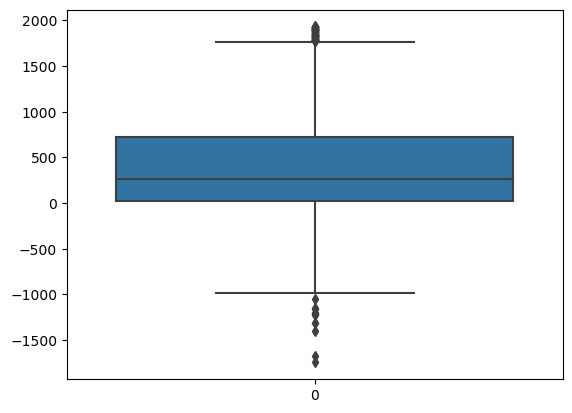

In [31]:
sns.boxplot(df2["balance"])

In [32]:
Q3=df2["balance"].quantile(q=0.75)
Q1=df2["balance"].quantile(q=0.25)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [33]:
df2["balance"]=df2["balance"][~(df2["balance"]>upper)|(df2["balance"]<lower)]

<Axes: >

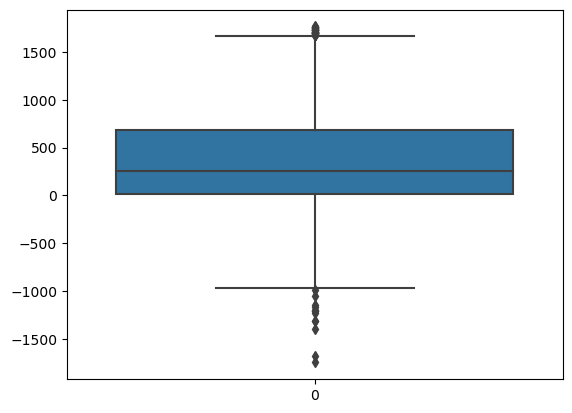

In [34]:
sns.boxplot(df2["balance"])

In [35]:
# Check null values
df2.isnull().sum()

age           38
job            0
marital        0
education      0
default       76
balance      989
housing        0
loan         691
contact        0
day            0
month          0
duration     330
campaign     318
pdays        816
previous     816
poutcome     816
y            521
dtype: int64

In [36]:
# shape of dataset
df2.shape

(4521, 17)

In [37]:
# Drop null values  
df2.dropna(inplace=True)

In [38]:
# Shape of Data
df2.shape

(1878, 17)

In [39]:
df2.isnull().sum().sum()

0

## Skewness

In [41]:
df2.skew()

age          0.462417
job          0.228374
marital     -0.055756
education    0.240936
default      0.000000
balance      0.705171
housing     -0.304007
loan         0.000000
contact      0.385951
day          0.117301
month       -0.555718
duration     1.162269
campaign     1.189806
pdays        0.000000
previous     0.000000
poutcome     0.000000
y            0.000000
dtype: float64

## Split Data X and Y

In [43]:
x=df2.drop(["y"],axis=1)

In [44]:
y=df2["y"]

## Scaling

In [46]:
from scipy.stats import zscore

In [47]:
x_sc=x.apply(zscore)

In [48]:
x_sc.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4,1.932992,-1.051210,-0.238913,-0.278659,NaN,-0.789677,0.859586,NaN,1.246441,-1.300773,0.863331,0.206163,-0.902330,NaN,NaN,NaN
7,-0.142393,1.359993,-0.238913,-0.278659,NaN,-0.497167,0.859586,NaN,-0.849187,-1.181847,0.863331,-0.338060,-0.165237,NaN,NaN,NaN
8,0.065146,-0.749810,-0.238913,1.046207,NaN,-0.349916,0.859586,NaN,1.246441,-0.230442,0.863331,-1.020153,-0.165237,NaN,NaN,NaN
11,0.272684,-1.352610,-0.238913,-0.278659,NaN,-0.264352,0.859586,NaN,-0.849187,0.126335,-1.911741,-0.613800,-0.165237,NaN,NaN,NaN
12,-0.453700,1.359993,-0.238913,1.046207,NaN,1.417088,-1.163350,NaN,-0.849187,-0.349368,-1.564857,0.946307,-0.165237,NaN,NaN,NaN


In [49]:
x_sc.drop(["default","pdays","previous","poutcome","loan"],axis=1,inplace=True)

In [50]:
x_sc.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign
4,1.932992,-1.051210,-0.238913,-0.278659,-0.789677,0.859586,1.246441,-1.300773,0.863331,0.206163,-0.902330
7,-0.142393,1.359993,-0.238913,-0.278659,-0.497167,0.859586,-0.849187,-1.181847,0.863331,-0.338060,-0.165237
8,0.065146,-0.749810,-0.238913,1.046207,-0.349916,0.859586,1.246441,-0.230442,0.863331,-1.020153,-0.165237
11,0.272684,-1.352610,-0.238913,-0.278659,-0.264352,0.859586,-0.849187,0.126335,-1.911741,-0.613800,-0.165237
12,-0.453700,1.359993,-0.238913,1.046207,1.417088,-1.163350,-0.849187,-0.349368,-1.564857,0.946307,-0.165237


## Split Data training and testing

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.3,random_state=1)

In [54]:
print("x_train Data Shape : ",x_train.shape)
print("y_train Data Shape : ",y_train.shape)
print()
print("x_test Data Shape : ",x_test.shape)
print("y_test Data Shape : ",y_test.shape)

x_train Data Shape :  (1314, 11)
y_train Data Shape :  (1314,)

x_test Data Shape :  (564, 11)
y_test Data Shape :  (564,)


## Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
# Object Creation
dtc=DecisionTreeClassifier()

In [58]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [59]:
dtc.score(x_train,y_train)*100

100.0

In [60]:
dtc.score(x_test,y_test)*100

100.0

### Accuracy Score

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
y_true,y_pred=y_test,dtc.predict(x_test)

In [64]:
accuracy_score(y_true,y_pred)*100

100.0